In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Resources/mbti_randomSample.csv')
data.head()

,Unnamed: 0,type,posts
0,5150,INFJ,'Until my mid-twenties I couldn't care less wh...
1,4661,INFJ,'http://personalitycafe.com/attachments/infj-f...
2,3397,INFJ,"Definitely conflict, too. Unreasonable loudnes..."
3,6839,INFJ,"'Last night, was racing people on my old schoo..."
4,5044,INFJ,'Looks like the preliminary results from the p...


In [3]:
#split the posts into arrays 
data['posts_array']= [[x for x in post.split('|||') if len(x)>0] for post in data['posts']]
data.head()

,Unnamed: 0,type,posts,posts_array
0,5150,INFJ,'Until my mid-twenties I couldn't care less wh...,['Until my mid-twenties I couldn't care less w...
1,4661,INFJ,'http://personalitycafe.com/attachments/infj-f...,['http://personalitycafe.com/attachments/infj-...
2,3397,INFJ,"Definitely conflict, too. Unreasonable loudnes...","[Definitely conflict, too. Unreasonable loudne..."
3,6839,INFJ,"'Last night, was racing people on my old schoo...","['Last night, was racing people on my old scho..."
4,5044,INFJ,'Looks like the preliminary results from the p...,['Looks like the preliminary results from the ...


In [ ]:
#create columns for individual letters 
for index, row in data.iterrows(): 
    mbti_type = list(row['type'])
    data.loc[index,'IorE']=mbti_type[0]
    data.loc[index,'SorN']=mbti_type[1]
    data.loc[index,'TorF']=mbti_type[2]
    data.loc[index,'PorJ']=mbti_type[3]

In [85]:
#creating Feature for #of Hyperlinks in posts & array of posts without any hyper links
for index, row in data.iterrows():
    temp_a = []
    cnt_hyperlinks = 0
    for i in row['posts_array']: 
        if i.count('http')>0:
            cnt_hyperlinks = cnt_hyperlinks+1
        else: 
            temp_a.append(i)
    data.at[index, 'No_links'] = temp_a
    data.at[index, 'Cnt_hyperlinks'] = cnt_hyperlinks/len(row['posts_array'])

In [87]:
data.head()

,Unnamed: 0,type,posts,posts_array,No_links,Cnt_hyperlinks,IorE,SorN,TorF,PorJ
0,5150,INFJ,'Until my mid-twenties I couldn't care less wh...,['Until my mid-twenties I couldn't care less w...,['Until my mid-twenties I couldn't care less w...,0.06,I,N,F,J
1,4661,INFJ,'http://personalitycafe.com/attachments/infj-f...,['http://personalitycafe.com/attachments/infj-...,[I don't quite know what I want. I choose to l...,0.28,I,N,F,J
2,3397,INFJ,"Definitely conflict, too. Unreasonable loudnes...","[Definitely conflict, too. Unreasonable loudne...","[Definitely conflict, too. Unreasonable loudne...",0.04,I,N,F,J
3,6839,INFJ,"'Last night, was racing people on my old schoo...","['Last night, was racing people on my old scho...","['Last night, was racing people on my old scho...",0.02,I,N,F,J
4,5044,INFJ,'Looks like the preliminary results from the p...,['Looks like the preliminary results from the ...,['Looks like the preliminary results from the ...,0.02,I,N,F,J


In [93]:
max(data['Cnt_hyperlinks'])

0.56

Text(0.5, 1.0, 'P vs J')

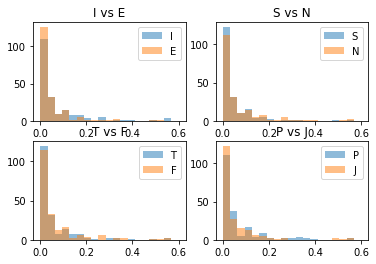

In [95]:
fig, axs = plt.subplots(2,2) 
bins = np.linspace(0,.6,20)

axs[0, 0].hist(data[data['IorE']=='I']['Cnt_hyperlinks'], bins, alpha=0.5, label='I')
axs[0, 0].hist(data[data['IorE']=='E']['Cnt_hyperlinks'], bins, alpha=0.5, label='E')
axs[0, 0].legend(loc='upper right')
axs[0, 0].set_title('I vs E')

axs[0, 1].hist(data[data['SorN']=='S']['Cnt_hyperlinks'], bins, alpha=0.5, label='S')
axs[0, 1].hist(data[data['SorN']=='N']['Cnt_hyperlinks'], bins, alpha=0.5, label='N')
axs[0, 1].legend(loc='upper right')
axs[0, 1].set_title('S vs N')


axs[1, 0].hist(data[data['TorF']=='T']['Cnt_hyperlinks'], bins, alpha=0.5, label='T')
axs[1, 0].hist(data[data['TorF']=='F']['Cnt_hyperlinks'], bins, alpha=0.5, label='F')
axs[1, 0].legend(loc='upper right')
axs[1, 0].set_title('T vs F')

axs[1, 1].hist(data[data['PorJ']=='P']['Cnt_hyperlinks'], bins, alpha=0.5, label='P')
axs[1, 1].hist(data[data['PorJ']=='J']['Cnt_hyperlinks'], bins, alpha=0.5, label='J')
axs[1, 1].legend(loc='upper right')
axs[1, 1].set_title('P vs J')


In [3]:
data['num_of_posts']= [len([x for x in post.split('|||') if len(x)>0]) for post in data['posts']]

In [4]:
data.head()

,Unnamed: 0,type,posts,num_of_posts
0,5150,INFJ,'Until my mid-twenties I couldn't care less wh...,50
1,4661,INFJ,'http://personalitycafe.com/attachments/infj-f...,50
2,3397,INFJ,"Definitely conflict, too. Unreasonable loudnes...",50
3,6839,INFJ,"'Last night, was racing people on my old schoo...",50
4,5044,INFJ,'Looks like the preliminary results from the p...,50


In [5]:
#create columns for individual letters 
for index, row in data.iterrows(): 
    mbti_type = list(row['type'])
    data.loc[index,'IorE']=mbti_type[0]
    data.loc[index,'SorN']=mbti_type[1]
    data.loc[index,'TorF']=mbti_type[2]
    data.loc[index,'PorJ']=mbti_type[3]

In [6]:
data['IorE'].value_counts()

I    200
E    200
Name: IorE, dtype: int64

In [7]:
data['SorN'].value_counts()

N    200
S    200
Name: SorN, dtype: int64

In [8]:
data['TorF'].value_counts()

F    200
T    200
Name: TorF, dtype: int64

In [9]:
data['PorJ'].value_counts()

P    200
J    200
Name: PorJ, dtype: int64

In [10]:
data = data[['type','IorE','SorN','TorF','PorJ','posts','num_of_posts']]

In [11]:
data['posts'][4].split('|||')

["'Looks like the preliminary results from the poll confirm my little haphazard theory thus far, especially in regards to the possible causality of the mistyping.  May mean my theory will eventually be...",
 'Hello everyone,  I am working on a personal theory of sorts related to male INFJs and our possible tendency to mistype early on when we first learn about MBTI typologies.  For example, I personally...',
 "It's been quite a while since I posted, but I'm thinking it might be time to make a come back.  Figured this wouldn't be the worst place to get started.  So hello, again.  Here are two random pics...",
 "Understated, yet refined.  Well-kempt, yet playfully casual.  Projecting a sense of presence, confidence, and stature which cannot be denied, yet does not cry out immaturely for attention.  It's...",
 "Well, I mean, when I someday rule the world, I totally plan to be one of those benevolent dictators.  You know...the tyrant with a heart of gold type of approach.  What's so dark o

# Evaluating Number of Posts as a Feature 

Number of Posts is not a good feature to use - majority of the population is posting more than 45 posts 

Text(0.5, 1.0, 'P vs J')

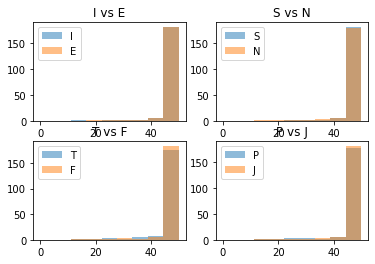

In [12]:
bins = np.linspace(0,50,10)
fig, axs = plt.subplots(2,2) 
axs[0, 0].hist(data[data['IorE']=='I']['num_of_posts'], bins, alpha=0.5, label='I')
axs[0, 0].hist(data[data['IorE']=='E']['num_of_posts'], bins, alpha=0.5, label='E')
axs[0, 0].legend(loc='upper left')
axs[0, 0].set_title('I vs E')

axs[0, 1].hist(data[data['SorN']=='S']['num_of_posts'], bins, alpha=0.5, label='S')
axs[0, 1].hist(data[data['SorN']=='N']['num_of_posts'], bins, alpha=0.5, label='N')
axs[0, 1].legend(loc='upper left')
axs[0, 1].set_title('S vs N')


axs[1, 0].hist(data[data['TorF']=='T']['num_of_posts'], bins, alpha=0.5, label='T')
axs[1, 0].hist(data[data['TorF']=='F']['num_of_posts'], bins, alpha=0.5, label='F')
axs[1, 0].legend(loc='upper left')
axs[1, 0].set_title('T vs F')

axs[1, 1].hist(data[data['PorJ']=='P']['num_of_posts'], bins, alpha=0.5, label='P')
axs[1, 1].hist(data[data['PorJ']=='J']['num_of_posts'], bins, alpha=0.5, label='J')
axs[1, 1].legend(loc='upper left')
axs[1, 1].set_title('P vs J')


# Evaluating Youtube references as a Feature 

In [13]:
data['ref_YT']= [post.count('youtube') for post in data['posts']]

Text(0.5, 1.0, 'P vs J')

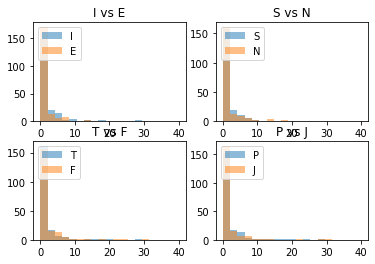

In [14]:
fig, axs = plt.subplots(2,2) 
bins = np.linspace(0,40,20)

axs[0, 0].hist(data[data['IorE']=='I']['ref_YT'], bins, alpha=0.5, label='I')
axs[0, 0].hist(data[data['IorE']=='E']['ref_YT'], bins, alpha=0.5, label='E')
axs[0, 0].legend(loc='upper left')
axs[0, 0].set_title('I vs E')

axs[0, 1].hist(data[data['SorN']=='S']['ref_YT'], bins, alpha=0.5, label='S')
axs[0, 1].hist(data[data['SorN']=='N']['ref_YT'], bins, alpha=0.5, label='N')
axs[0, 1].legend(loc='upper left')
axs[0, 1].set_title('S vs N')


axs[1, 0].hist(data[data['TorF']=='T']['ref_YT'], bins, alpha=0.5, label='T')
axs[1, 0].hist(data[data['TorF']=='F']['ref_YT'], bins, alpha=0.5, label='F')
axs[1, 0].legend(loc='upper left')
axs[1, 0].set_title('T vs F')

axs[1, 1].hist(data[data['PorJ']=='P']['ref_YT'], bins, alpha=0.5, label='P')
axs[1, 1].hist(data[data['PorJ']=='J']['ref_YT'], bins, alpha=0.5, label='J')
axs[1, 1].legend(loc='upper left')
axs[1, 1].set_title('P vs J')


In [15]:
data['countPunct']= [len(re.findall('[?!]',post)) for post in data['posts']]

In [16]:
data['countPunct']= [np.mean([len(re.findall('[?!]',post)) for x in post.split('|||') if len(x)>0]) for post in data['posts']]

In [17]:
data['countQM']= [np.mean([post.count('?') for x in post.split('|||') if len(x)>0]) for post in data['posts']]

In [18]:
re.findall('[?!.]',data['posts'][4])

['.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '!',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '!',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '?',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '!',
 '.',
 '.',
 '.',
 '!',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '!',
 '.',
 '!',
 '!',
 '.',
 '.',
 '.',
 '.',
 '!',
 '!',
 '.',
 '.',
 '.',
 '.',
 '.'

Text(0.5, 1.0, 'P vs J')

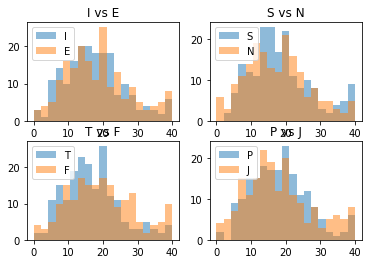

In [19]:
fig, axs = plt.subplots(2,2) 
bins = np.linspace(0,40,20)

axs[0, 0].hist(data[data['IorE']=='I']['countPunct'], bins, alpha=0.5, label='I')
axs[0, 0].hist(data[data['IorE']=='E']['countPunct'], bins, alpha=0.5, label='E')
axs[0, 0].legend(loc='upper left')
axs[0, 0].set_title('I vs E')

axs[0, 1].hist(data[data['SorN']=='S']['countPunct'], bins, alpha=0.5, label='S')
axs[0, 1].hist(data[data['SorN']=='N']['countPunct'], bins, alpha=0.5, label='N')
axs[0, 1].legend(loc='upper left')
axs[0, 1].set_title('S vs N')


axs[1, 0].hist(data[data['TorF']=='T']['countPunct'], bins, alpha=0.5, label='T')
axs[1, 0].hist(data[data['TorF']=='F']['countPunct'], bins, alpha=0.5, label='F')
axs[1, 0].legend(loc='upper left')
axs[1, 0].set_title('T vs F')

axs[1, 1].hist(data[data['PorJ']=='P']['countPunct'], bins, alpha=0.5, label='P')
axs[1, 1].hist(data[data['PorJ']=='J']['countPunct'], bins, alpha=0.5, label='J')
axs[1, 1].legend(loc='upper left')
axs[1, 1].set_title('P vs J')


Text(0.5, 1.0, 'P vs J')

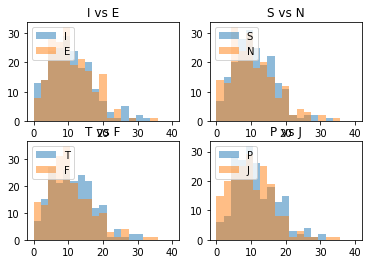

In [20]:
fig, axs = plt.subplots(2,2) 
bins = np.linspace(0,40,20)

axs[0, 0].hist(data[data['IorE']=='I']['countQM'], bins, alpha=0.5, label='I')
axs[0, 0].hist(data[data['IorE']=='E']['countQM'], bins, alpha=0.5, label='E')
axs[0, 0].legend(loc='upper left')
axs[0, 0].set_title('I vs E')

axs[0, 1].hist(data[data['SorN']=='S']['countQM'], bins, alpha=0.5, label='S')
axs[0, 1].hist(data[data['SorN']=='N']['countQM'], bins, alpha=0.5, label='N')
axs[0, 1].legend(loc='upper left')
axs[0, 1].set_title('S vs N')


axs[1, 0].hist(data[data['TorF']=='T']['countQM'], bins, alpha=0.5, label='T')
axs[1, 0].hist(data[data['TorF']=='F']['countQM'], bins, alpha=0.5, label='F')
axs[1, 0].legend(loc='upper left')
axs[1, 0].set_title('T vs F')

axs[1, 1].hist(data[data['PorJ']=='P']['countQM'], bins, alpha=0.5, label='P')
axs[1, 1].hist(data[data['PorJ']=='J']['countQM'], bins, alpha=0.5, label='J')
axs[1, 1].legend(loc='upper left')
axs[1, 1].set_title('P vs J')

In [21]:
data['countLOL']= [post.count('lol') for post in data['posts']]

In [22]:
data.head()

,type,IorE,SorN,TorF,PorJ,posts,num_of_posts,ref_YT,countPunct,countQM,countLOL
0,INFJ,I,N,F,J,'Until my mid-twenties I couldn't care less wh...,50,0,25.0,9.0,0
1,INFJ,I,N,F,J,'http://personalitycafe.com/attachments/infj-f...,50,1,17.0,7.0,0
2,INFJ,I,N,F,J,"Definitely conflict, too. Unreasonable loudnes...",50,2,23.0,20.0,0
3,INFJ,I,N,F,J,"'Last night, was racing people on my old schoo...",50,0,3.0,2.0,0
4,INFJ,I,N,F,J,'Looks like the preliminary results from the p...,50,0,23.0,2.0,1


Text(0.5, 1.0, 'P vs J')

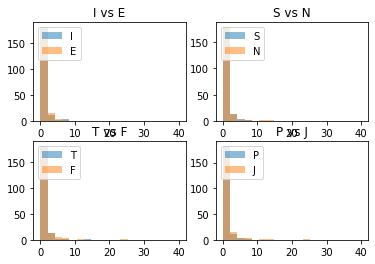

In [23]:
fig, axs = plt.subplots(2,2) 
bins = np.linspace(0,40,20)

axs[0, 0].hist(data[data['IorE']=='I']['countLOL'], bins, alpha=0.5, label='I')
axs[0, 0].hist(data[data['IorE']=='E']['countLOL'], bins, alpha=0.5, label='E')
axs[0, 0].legend(loc='upper left')
axs[0, 0].set_title('I vs E')

axs[0, 1].hist(data[data['SorN']=='S']['countLOL'], bins, alpha=0.5, label='S')
axs[0, 1].hist(data[data['SorN']=='N']['countLOL'], bins, alpha=0.5, label='N')
axs[0, 1].legend(loc='upper left')
axs[0, 1].set_title('S vs N')


axs[1, 0].hist(data[data['TorF']=='T']['countLOL'], bins, alpha=0.5, label='T')
axs[1, 0].hist(data[data['TorF']=='F']['countLOL'], bins, alpha=0.5, label='F')
axs[1, 0].legend(loc='upper left')
axs[1, 0].set_title('T vs F')

axs[1, 1].hist(data[data['PorJ']=='P']['countLOL'], bins, alpha=0.5, label='P')
axs[1, 1].hist(data[data['PorJ']=='J']['countLOL'], bins, alpha=0.5, label='J')
axs[1, 1].legend(loc='upper left')
axs[1, 1].set_title('P vs J')